In [ ]:
import gym
import numpy as np 

In [ ]:
# 1. Load Environment and Q-table structure
env = gym.make("FrozenLake-v0", is_slippery=False) 

Q = np.zeros([env.observation_space.n//2,env.action_space.n]) #learner agent
Q2 = np.zeros([env.observation_space.n,env.action_space.n])  #expert agent
# env.obeservation.n, env.action_space.n gives number of states and action in env loaded
# 2. Parameters of Q-leanring
eta = .628
gma = .9
episode = 1000
rev_list = [] # rewards per episode calculate

In [ ]:
# 3. Q-learning Algorithm
time = []
if_win = []
test_rev_list = []
for i in range(episode):
    # Reset environment
    s = env.reset()
    info = env.step(env.action_space.sample())
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        #env.render()
        # Choose action from Q table
        a = np.argmax(Q[s//2,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state & reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q2[s,a] = Q2[s,a] + eta*(r + gma*Q2[s1,np.argmax(Q[s1//2,:])] - Q2[s,a])
        #Q[s//2,:] = 0.9*Q[s//2,:] + 0.1*(Q2[s,:]-max(Q2[s,:]))
        Q[s//2,:] = 0.9*Q[s//2,:] + 0.1*(Q2[s,:])
        rAll += r
        s = s1
        j+=1
        if d == True:
            break
            time.append(j)
        time.append(j)
        
    rev_list.append(rAll)
    if_win.append(r)
    #env.render()
    if i%10==1:
        rAll = 0
        for episode_i in range(5):
            state = env.reset()
            step = 0
            done = False

            for step in range(99):
                #env.render()
                # Take the action (index) that have the maximum expected future reward given that state
                action = np.argmax(Q[state//2,:])

                new_state, reward, done, info = env.step(action)
                rAll += reward
                if done:
                    break
                state = new_state
        test_rev_list.append(rAll/5.0)
        




In [ ]:
print ("Reward Sum on all episodes %f"  %(sum(rev_list)/episode))
print ("Final Values Q-Table")
print (Q)

Reward Sum on all episodes 0.707000
Final Values Q-Table
[[0.         0.         0.51110193 0.05621812]
 [0.         0.729      0.         0.08792702]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9        0.         0.        ]
 [0.         0.         0.05543763 0.        ]
 [0.         0.         1.         0.20061525]]


In [ ]:
print (Q2)

[[0.         0.         0.53722596 0.04924677]
 [0.         0.         0.6561     0.0681834 ]
 [0.         0.729      0.         0.08792702]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9        0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.55437635 0.        ]
 [0.         0.         1.         0.20061525]
 [0.         0.         0.         0.        ]]


In [ ]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(99):
        env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(Q[state//2,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            break
        state = new_state
env.close()

****************************************************
EPISODE  0

SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
****************************************************
EPISODE  1

SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
****************************************************
EPISODE  2

SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
****************************************************
EPISODE  3

SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
****************************************************
EPISODE  4

SFFF
FH

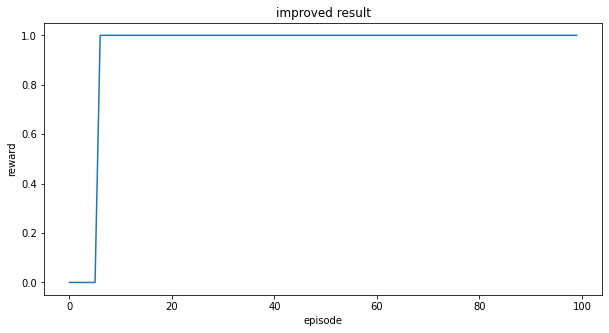

In [ ]:
import matplotlib.pyplot as plt

#这个是第一个figure对象,下面的内容都会在第一个figure中显示
plt.figure(num = 3,figsize = (10,5))
plt.title("improved result")
plt.xlabel("episode")
plt.ylabel("reward")
plt.plot(test_rev_list)
plt.show()